# Programming for Data Science and Artificial Intelligence

## 3 Pandas

### Readings: 
- [VANDER] Ch3
- https://pandas.pydata.org/docs/

Pandas is a newer package **built on top of NumPy**, and provides an efficient implementation of a DataFrame.

DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data

Offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs

Although NumPy ndarray data structure provides essential features, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) 

Pandas provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

In [ ]:
import pandas as pd

## Series

A Pandas <code>Series</code> is a one-dimensional array of indexed data. It can be created from a list or array as follows:

### Creating a series from list

In [ ]:
data_pd = pd.Series([0.25, 0.5, 0.75, 1.0])
print("Pandas series from list:\n", data_pd)

Pandas series from list:
 0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


### Creating a series from numpy array

In [ ]:
import numpy as np
numpy_arr = np.arange(5)
data_pd   = pd.Series(numpy_arr)
print("Pandas series from numpy array: \n", data_pd)  # notice default index

Pandas series from numpy array: 
 0    0
1    1
2    2
3    3
4    4
dtype: int64


### Attributes

In [ ]:
print("1: Data values: ", data_pd.values)  # numpy array 
print("2: Data index:  ", data_pd.index)  # range index is pandas object

1: Data values:  [0 1 2 3 4]
2: Data index:   RangeIndex(start=0, stop=5, step=1)


### Pandas and dictionary

In [ ]:
# since pandas index system looks like dictionary, it is no surprise
# that pandas can be created from dictionary, see this:
some_population_dict = {'Chiangrai':    11111, 
                        'Pathum Thani': 22222,
                        'Bangkok':      33333,
                        'Chiangmai':    44444}

data_pd = pd.Series(some_population_dict)
print("1: Population['Bangkok']: ", data_pd['Bangkok'])

# also supports slicing!  Notice that Chiangmai is being included as well!
print("2: Population['Pathumthan':'Chiangmai']: \n", data_pd['Pathum Thani': 'Chiangmai'])

1: Population['Bangkok']:  33333
2: Population['Pathumthan':'Chiangmai']: 
 Pathum Thani    22222
Bangkok         33333
Chiangmai       44444
dtype: int64


## Dataframe

DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names.  DataFrame as a sequence of aligned Series objects.

### Create dataframe with two dict

In [ ]:
some_population_dict = {'Chiangrai':    11111, 
                        'Pathum Thani': 22222,
                        'Bangkok':      33333,
                        'Chiangmai':    44444}
some_area_dict = {'Chiangrai':  999, 
                'Pathum Thani': 888,
                'Bangkok':      777,
                'Chiangmai':    666,
                 'Syria':       333}

states = pd.DataFrame({'population': some_population_dict,
                       'area': some_area_dict})
print("Everything: ")
print(states)

Everything: 
              population  area
Chiangrai        11111.0   999
Pathum Thani     22222.0   888
Bangkok          33333.0   777
Chiangmai        44444.0   666
Syria                NaN   333


### Attributes

In [ ]:
print("Index:        ", states.index)        # pandas index object
print("Index[-1]:    ", states.index[-1])    # pandas index object is similar to numpy array
print("Columns:      ", states.columns)      # pandas index object
print("Columns[0:1]: ", states.columns[0:1]) # notice how 1 is not included

Index:         Index(['Chiangrai', 'Pathum Thani', 'Bangkok', 'Chiangmai', 'Syria'], dtype='object')
Index[-1]:     Syria
Columns:       Index(['population', 'area'], dtype='object')
Columns[0:1]:  Index(['population'], dtype='object')


### Other ways to create

In [ ]:
# from series
population_series = pd.Series(some_population_dict)
pd_from_series    = pd.DataFrame(population_series, columns=['population'])  # since it's series, we need to pass column name, if not, it will be named 0
print("PD from series: \n", pd_from_series)

# from 2D numpy array
data_numpy    = np.random.rand(3, 2)
index         = ['a', 'b', 'c']
columns       = ['foo', 'bar']
pd_from_numpy = pd.DataFrame(data_numpy, index=index, columns=columns)
print("PD from numpy: \n", pd_from_numpy)

PD from series: 
               population
Chiangrai          11111
Pathum Thani       22222
Bangkok            33333
Chiangmai          44444
PD from numpy: 
         foo       bar
a  0.422053  0.653820
b  0.971555  0.152072
c  0.496383  0.066447


## <span style="color:blue"> \\\ Quiz Time - Creating Series and DataFrame //</span> 

 ## Series indexing/slicing

In [ ]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = ['a', 'b', 'c', 'd'])

print("Data:\n", data)

Data:
 a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


### Explicit vs. Implicit index

In [ ]:
# explicit index
print("Explicit index: ", data['b'])

# also support implicit index, since we define index
print("Implicit index: ", data[-1])

Explicit index:  0.5
Implicit index:  1.0


In [ ]:
# slicing with explicit index (include c)
print("Data['a':'c']: \n", data['a':'c'])

# slicing with implicit index (exclude 2)
print("Data[0:2]: \n", data[0:2])

Data['a':'c']: 
 a    0.25
b    0.50
c    0.75
dtype: float64
Data[0:2]: 
 a    0.25
b    0.50
dtype: float64


### Adding values

In [ ]:
# extend series by assigning new index value
data['e'] = 99
print("Data with e: \n", data)

Data with e: 
 a     0.25
b     0.50
c     0.75
d     1.00
e    99.00
dtype: float64


### "in"

In [ ]:
print("a in data?: ", 'a' in data)  # access keys

a in data?:  True


### keys()

In [ ]:
print("All keys: ", data.keys()) # pandas index object

All keys:  Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


#### items()

In [ ]:
print("All items: ", list(data.items())) # zip object

All items:  [('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0), ('e', 99.0)]


### values()

In [ ]:
print("All values: ", data.values) # numpy array object

All values:  [ 0.25  0.5   0.75  1.   99.  ]


### masking

In [ ]:
print("Data[(data > 0.3) & (data < 0.8)]: \n", data[(data>0.3) & (data < 0.8)])

Data[(data > 0.3) & (data < 0.8)]: 
 b    0.50
c    0.75
dtype: float64


### iloc vs. loc

In [ ]:
# some precaution on the possible confusion if you use explicit integer index
# use explicit index when indexing
data = pd.Series(['a', 'b', 'c'], index=(1, 3, 5))
print("Data[1]: ", data[1])

# use implicit index when slicing
print("Data[1:3]: \n", data[1:3])

# due to this possible confusion due to explicit integer index, pandas
# provide loc and iloc
# loc uses explicit index
print("Data loc [1]: ", data.loc[1])
print("Data loc [1:3]: \n", data.loc[1:3])  # include 3 as well

#iloc uses implicit index
print("Data iloc [1]: ", data.iloc[1])
print("Data iloc [1:3]: \n", data.iloc[1:3])  # does not include 3

# always use iloc for implicit index, for no unnecessary confusion!

Data[1]:  a
Data[1:3]: 
 3    b
5    c
dtype: object
Data loc [1]:  a
Data loc [1:3]: 
 1    a
3    b
dtype: object
Data iloc [1]:  b
Data iloc [1:3]: 
 3    b
5    c
dtype: object


## DataFrame indexing/slicing/fancy Indexing

In [ ]:
some_population_dict = {'Chiangrai': 11111, 
                        'Pathum Thani': 22222,
                        'Bangkok': 33333,
                        'Chiangmai': 44444}
some_area_dict = {'Chiangrai': 999, 
                'Pathum Thani': 888,
                'Bangkok': 777,
                'Chiangmai': 666,
                 'Syria': 333}
data = pd.DataFrame({'pop': some_population_dict,
                       'area': some_area_dict})

print("==data==")
print(data)

==data==
                  pop  area
Chiangrai     11111.0   999
Pathum Thani  22222.0   888
Bangkok       33333.0   777
Chiangmai     44444.0   666
Syria             NaN   333


### dictionary style access

In [ ]:
# dataframe can be accessed via dictionary style indexing
print("==Area==")
print(data['area'])

==Area==
Chiangrai       999
Pathum Thani    888
Bangkok         777
Chiangmai       666
Syria           333
Name: area, dtype: int64


### attribute style access

In [ ]:
# we can also use attribute-style
print("==Area using attributes==")
print(data.area)
print("Data area is same: ", data.area is data['area'])

==Area using attributes==
Chiangrai       999
Pathum Thani    888
Bangkok         777
Chiangmai       666
Syria           333
Name: area, dtype: int64
Data area is same:  True


### attribute style does not always work

In [ ]:
# However!!, keep in mind that attribute style does not always work
# for example, pop is a method, thus data.pop will point to some method instead
print("==Do not use .pop!==")
print("Some pop method: \n", data.pop)
print("Data pop not the same: ", data.pop is data['pop'])

==Do not use .pop!==
Some pop method: 
 <bound method DataFrame.pop of                   pop  area
Chiangrai     11111.0   999
Pathum Thani  22222.0   888
Bangkok       33333.0   777
Chiangmai     44444.0   666
Syria             NaN   333>
Data pop not the same:  False


### Such access only for columns

In [ ]:
# print("Data['Chiangrai'] error: ", data['Chiangrai'])

### Feature engineering

In [ ]:
print("==Feature engineering with density==")
data['density'] = data['pop'] / data['area']
print(data)

==Feature engineering with density==
                  pop  area    density
Chiangrai     11111.0   999  11.122122
Pathum Thani  22222.0   888  25.024775
Bangkok       33333.0   777  42.899614
Chiangmai     44444.0   666  66.732733
Syria             NaN   333        NaN


### iloc and loc

In [ ]:
# we cannot use data[0] since we do not have explicit index called 0, use iloc instead
print("==First row using iloc==")
print(data.iloc[0])

==First row using iloc==
pop        11111.000000
area         999.000000
density       11.122122
Name: Chiangrai, dtype: float64


In [ ]:
print("==First three rows, first two columns using iloc==")
print(data.iloc[:3, :2])

==First three rows, first two columns using iloc==
                  pop  area
Chiangrai     11111.0   999
Pathum Thani  22222.0   888
Bangkok       33333.0   777


In [ ]:
# use loc for explicit index
print("==Use loc for explicit index==")
print(data.loc[:'Bangkok', :'pop'])

==Use loc for explicit index==
                  pop
Chiangrai     11111.0
Pathum Thani  22222.0
Bangkok       33333.0


In [ ]:
# chaining is possible for combine
print("==chain iloc and loc==")
print(data.loc[:'Bangkok'].iloc[:, :2])

==chain iloc and loc==
                  pop  area
Chiangrai     11111.0   999
Pathum Thani  22222.0   888
Bangkok       33333.0   777


#### masking

In [ ]:
print("==masking==")
print(data.loc[data.density > 20, ['pop', 'density']])

==masking==
                  pop    density
Pathum Thani  22222.0  25.024775
Bangkok       33333.0  42.899614
Chiangmai     44444.0  66.732733


### Indexing vs. slicing

In [ ]:
### some really important convention to keep in mind###
#1.  indexing refers to columns, while slicing refer to rows
print("==Indexing refer to columns==")
print(data['pop'])
#print(data['Chiangrai']) error

print("==Slicing refer to rows==")
print(data['Chiangrai': 'Pathum Thani']) # include Pathum Thani
#print(data['pop': 'area']) error

print("==Slicing can also use implicit integers==")
print(data[1:3])  # not including 3

print("==masking are done row-wise==")
print(data[data.density > 20])

==Indexing refer to columns==
Chiangrai       11111.0
Pathum Thani    22222.0
Bangkok         33333.0
Chiangmai       44444.0
Syria               NaN
Name: pop, dtype: float64
==Slicing refer to rows==
                  pop  area    density
Chiangrai     11111.0   999  11.122122
Pathum Thani  22222.0   888  25.024775
==Slicing can also use implicit integers==
                  pop  area    density
Pathum Thani  22222.0   888  25.024775
Bangkok       33333.0   777  42.899614
==masking are done row-wise==
                  pop  area    density
Pathum Thani  22222.0   888  25.024775
Bangkok       33333.0   777  42.899614
Chiangmai     44444.0   666  66.732733


## <span style="color:blue"> \\\ Quiz Time - Indexing/slicing/fancy Indexing //</span> 

### Index alignment

In [ ]:
area = pd.Series({'Alaska': 111, 'Texas': 222,
                 'California': 333}, name = 'area')

population = pd.Series({'California' : 999, 'Texas': 888,
                       'New York': 777}, name = 'population')

#as you can see, any missing value will be replaced with NaN
print("==population / area==")
print(population / area)

==population / area==
Alaska        NaN
California    3.0
New York      NaN
Texas         4.0
dtype: float64


In [ ]:
#similarly
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
print("==A + B==")
print(A + B)

==A + B==
0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64


In [ ]:
#we can use fill_value params in pd.add(pd)
print("==A.add(B, fill_value=0)==")  #any missing Nan values will be replaced with 0
print(A.add(B, fill_value = 0))

==A.add(B, fill_value=0)==
0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64


### === Task 1 ===

1. Load the csv file "howlongwelive.csv" in the data folder into dataframe <br>
Hint: https://www.kaggle.com/rtatman/reproducibility-tips-absolute-vs-relative-paths

2. Print the first 2 rows, and last 2 rows

3. Print the shape

4. Print the feature (column) names

5. Print the summary using .describe()

6. Since Hepatatis B has a lot of nans, and highly correlate with Diptheria, drop column Hepatatis.  Also drop column Population since there are way too many nans

7. Convert <code>Status</code> to 0 or 1. (0 for Developing and 1 for Developed)

8. Rename column <code>thinness 1-19 years</code> to <code>thinness 10-19 years</code>

9. Get all columns except Life Expectancy, and convert to numpy array called X

10. Get the column life expetancy and convert to numpy array called y

## Handling missing data

### np.nan

In [ ]:
print("Type of np.nan: ", type(np.nan))
print("Np nan - 1:     ", np.nan - 1) #any operation with nan is nan

Type of np.nan:  <class 'float'>
Np nan - 1:      nan


In [ ]:
vals2 = np.array([1, np.nan, 3, 4])
print("Sum:    ", vals2.sum())
print("Nansum: ", np.nansum(vals2))
print("Nanmin: ", np.nanmin(vals2))
print("Nanmax: ", np.nanmax(vals2))

Sum:     nan
Nansum:  8.0
Nanmin:  1.0
Nanmax:  4.0


### isnull()

In [ ]:
#isnull() - check any missing values
dfs = pd.Series([1, np.nan, "hello", None])
print("Is null: ", dfs.isnull())

Is null:  0    False
1     True
2    False
3     True
dtype: bool


### not null

In [ ]:
print("==Only data not null==")
print(dfs[dfs.notnull()])

==Only data not null==
0        1
2    hello
dtype: object


### dropna()

In [ ]:
print("==Drop all na==")
print(dfs.dropna())  #this is not in place!
print(dfs)  #this will bring back the old copy

==Drop all na==
0        1
2    hello
dtype: object
0        1
1      NaN
2    hello
3     None
dtype: object


In [ ]:
# drop columns with na, use axis = 1
df = pd.DataFrame([[1, np.nan, 2],
                  [2, 3, 5],
                  [np.nan, 4, np.nan],
                  [4, np.nan, np.nan]])

print(df.dropna(axis=1))  #default is axis = 0

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


In [ ]:
#drop columns, if all values is nan
df[3] = np.nan  #create new column
print(df.dropna(axis=1, how="all"))

     0    1    2
0  1.0  NaN  2.0
1  2.0  3.0  5.0
2  NaN  4.0  NaN
3  4.0  NaN  NaN


### fillna()

In [ ]:
# most of the time, if you have missing values, it is advised
# to drop them.  This is against many opinions.  
# However, the case is that:
# When you replace missing value with mean, you lower the variance
# When you replace with median, you also lower the variance
# when you replace with some value, you introduce noise
# but first, let's see how to replace value

print("==Fill na with 0==")
print(df.fillna(0))  #not in place, reminders!

print("==Fill all na with mean==")
print(df.fillna(df.mean()))

print("replace df.mean() for col 1 with in place")
df[1].fillna(df[1].mean(), inplace=True)  #this is in place!
print(df)

print("==Interpolate==")
print(df.interpolate(method='values'))

==Fill na with 0==
     0    1    2    3
0  1.0  0.0  2.0  0.0
1  2.0  3.0  5.0  0.0
2  0.0  4.0  0.0  0.0
3  4.0  0.0  0.0  0.0
==Fill all na with mean==
          0    1    2   3
0  1.000000  3.5  2.0 NaN
1  2.000000  3.0  5.0 NaN
2  2.333333  4.0  3.5 NaN
3  4.000000  3.5  3.5 NaN
replace df.mean() for col 1 with in place
     0    1    2   3
0  1.0  3.5  2.0 NaN
1  2.0  3.0  5.0 NaN
2  NaN  4.0  NaN NaN
3  4.0  3.5  NaN NaN
==Interpolate==
     0    1    2   3
0  1.0  3.5  2.0 NaN
1  2.0  3.0  5.0 NaN
2  3.0  4.0  5.0 NaN
3  4.0  3.5  5.0 NaN


## Aggregation

In [ ]:
df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                    ('bird', 'Psittaciformes', 24.0),
                    ('mammal', 'Carnivora', 80.2),
                    ('mammal', 'Primates', np.nan),
                    ('mammal', 'Carnivora', 58)],
                   index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                   columns=('class', 'order', 'max_speed'))
df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [ ]:
grouped = df.groupby('class')  #return a special view as DataFrameGroupByObject
grouped.sum()

,max_speed
class,
bird,413.0
mammal,138.2


In [ ]:
grouped = df.groupby('order')  #return a special view as DataFrameGroupByObject
grouped.sum()

,max_speed
order,
Carnivora,138.2
Falconiformes,389.0
Primates,0.0
Psittaciformes,24.0


In [ ]:
grouped = df.groupby(['class', 'order'])
grouped.sum()

max_speed
class  order                    
bird   Falconiformes       389.0
       Psittaciformes       24.0
mammal Carnivora           138.2
       Primates              0.0

In [ ]:
df.groupby(['class'])['max_speed'].median()
# .median()
# .min()
# .max()
# .std()
# .var()
# .sum()

class
bird      206.5
mammal     69.1
Name: max_speed, dtype: float64

## <span style="color:blue"> \\\ Quiz Time - Aggregation //</span> 

### === Task 2 ===

1. Continuing "howlongwelive.csv", check whether which column has how many missing data

2. Fix all missing data using means

3. Perform a <code>groupby</code> country.  Which country has the lowest/highest average life expectancy?

4. Perform a <code>groupby</code> status.  Is there any strong difference between developed and developing countries in their life expectancy?

5. Create another dataframe manually with 2 columns. First column is the ID column with same value as country column. Also add another column Noise_level, and populate with random values (whatever you like).  

6. Merge the two datasets together based on the ID column.

## Time Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data.  Let’s first understand how Python treat dates and times

In [ ]:
from datetime import datetime
datetime(year=2025, month=7, day=4)

datetime.datetime(2025, 7, 4, 0, 0)

Using the dateutil module, you can parse dates from a variety of string formats

In [ ]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Once you have a datetime object, you can do things like printing the day of the week:

In [ ]:
date.strftime('%A, %D')

'Saturday, 07/04/15'

We can similarly create numpy using type np.datetime64 which is a very efficient way to store datetime

In [ ]:
date = np.array('2015-07-04', dtype=np.datetime64)  #ISO date
date

array('2015-07-04', dtype='datetime64[D]')

Given its numpy type, we can quickly do vectorized operations on it

In [ ]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Pandas uses **Timestamp** object,  which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64. From a group of these Timestamp objects, Pandas can construct a **DatetimeIndex** that can be used to index data in a Series or DataFrame

In [ ]:
import pandas as pd
date = pd.to_datetime("2015-07-04")
print(type(date))
date.strftime('%A')

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


'Saturday'

In [ ]:
#perform numpy style vectorized operations using pd.to_timedelta
date + pd.to_timedelta(np.arange(12), 'D')  #unit is nanoseconds  #does not support Y and M because each M has unequal amount of nanoseconds

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

Where the Pandas time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a Series object that has time indexed data:

In [ ]:
# index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
#                           '2015-07-04', '2015-08-04'])
index = pd.to_datetime(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data  = pd.DataFrame(np.random.rand(4,2), index = index, columns=['Apple', 'Orange'])
data

,Apple,Orange
2014-07-04,0.198447,0.497158
2014-08-04,0.696944,0.025944
2015-07-04,0.110923,0.527532
2015-08-04,0.677384,0.988142


In [ ]:
#use slicing to access rows
data['2014-07-04':'2015-07-04']

,Apple,Orange
2014-07-04,0.198447,0.497158
2014-08-04,0.696944,0.025944
2015-07-04,0.110923,0.527532


In [ ]:
#there are special date-only indexing, such as passing a year
data['2015']

/tmp/ipykernel_16666/1707184782.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2015']


,Apple,Orange
2015-07-04,0.110923,0.527532
2015-08-04,0.677384,0.988142


A useful method is date_range, which generates date from specified start and end

In [ ]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods = 8)  #instead of end, we can specify the periods

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# if we want 8 periods, but in hours, we use freq params
pd.date_range('2015-07-03', periods = 8, freq='H') #try M

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
# if we want 8 periods, but in hours, we use freq params
pd.date_range('2015-07-03', periods = 18, freq='MS') #BH - Business Hours, MS - Month start

DatetimeIndex(['2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
pd.date_range('2015-07-03', periods = 18, freq='2H30T') #supports custom numbers

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 02:30:00',
               '2015-07-03 05:00:00', '2015-07-03 07:30:00',
               '2015-07-03 10:00:00', '2015-07-03 12:30:00',
               '2015-07-03 15:00:00', '2015-07-03 17:30:00',
               '2015-07-03 20:00:00', '2015-07-03 22:30:00',
               '2015-07-04 01:00:00', '2015-07-04 03:30:00',
               '2015-07-04 06:00:00', '2015-07-04 08:30:00',
               '2015-07-04 11:00:00', '2015-07-04 13:30:00',
               '2015-07-04 16:00:00', '2015-07-04 18:30:00'],
              dtype='datetime64[ns]', freq='150T')

## Stock

In [ ]:
from pandas_datareader import data
import os
# os.environ['http_proxy'] = 'http://192.41.170.23:3128'
# os.environ['https_proxy'] = 'http:/192.41.170.23:3128'

goog = data.DataReader('GOOG', start='2004', end='2016',
                      data_source='yahoo')

goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


<AxesSubplot:xlabel='Date'>

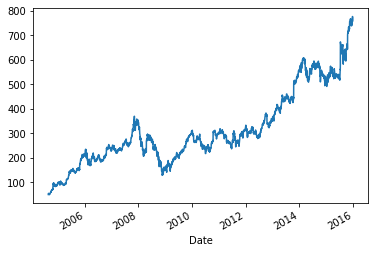

In [ ]:
import matplotlib.pyplot as plt

goog_close = goog['Close']
goog_close.plot()

One common need for time series data is resampling at a higher or lower frequency. This can be done using the resample() method, or the much simpler asfreq() method. The primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data. Here we will resample the data at the end of business year:

#### resample

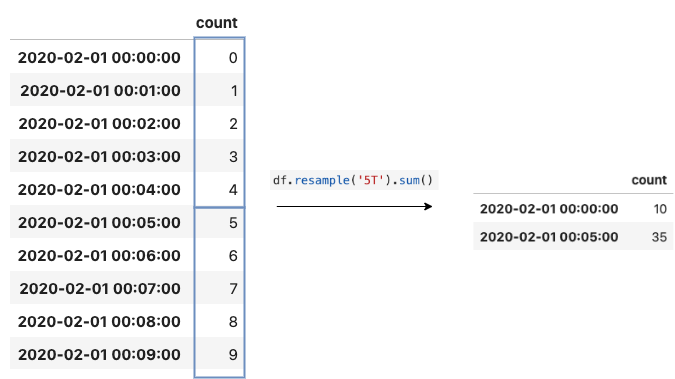

#### asfreq

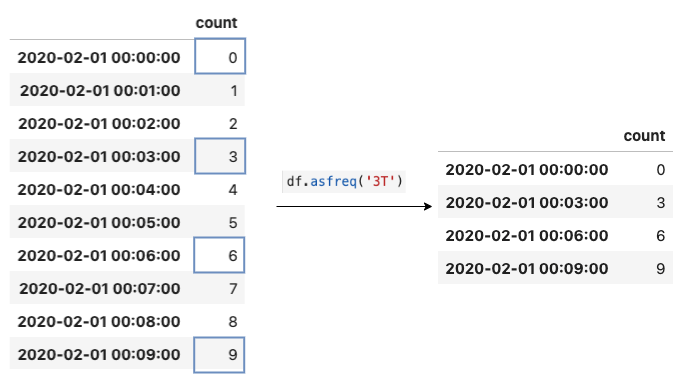

<AxesSubplot:xlabel='Date'>

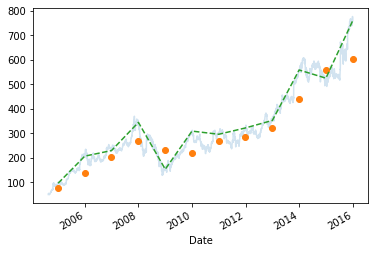

In [ ]:
goog_close.plot(alpha=0.2, style='-')
goog_close.resample('BA').mean().plot(style='o')  #BA = Business Year End
goog_close.asfreq('BA').plot(style='--')

#Notice the difference: at each point, resample reports the average 
#of the previous year, while asfreq reports the value at the end of the 
#year.

# orange dots represent goog_close.resample()
# green dashes represent goog_close.asfreq()

In [ ]:
#difference between resample and asfreq
ts = pd.Series(range(365), index = pd.date_range(start='20190101', 
                                                end='20191231',
                                                freq = 'D'))
ts.head()

2019-01-01    0
2019-01-02    1
2019-01-03    2
2019-01-04    3
2019-01-05    4
Freq: D, dtype: int64

In [ ]:
ts.asfreq(freq='Q')  #Quarter

2019-03-31     89
2019-06-30    180
2019-09-30    272
2019-12-31    364
Freq: Q-DEC, dtype: int64

In [ ]:
# this is not the average of each quarter, but the average of the last
# day of each quarter
ts.asfreq(freq='Q').mean()   #(89+180+272+364)/4

226.25

In [ ]:
bins = ts.resample('Q')  # return DateTimeIndexResampler which is like GroupBy object
# it actually create some groups

#this is actually the average of each quarter
bins.groups
bins.mean()  # think of resample as groupby, (you can call mean, sum, apply, just like group by)

2019-03-31     44.5
2019-06-30    135.0
2019-09-30    226.5
2019-12-31    318.5
Freq: Q-DEC, dtype: float64

Pandas has two closely related methods: shift() and tshift() In short, the difference between them is that shift() shifts the data, while tshift() shifts the index. In both cases, the shift is specified in multiples of the frequency.  Here we will both shift() and tshift() by 900 days;

/tmp/ipykernel_16666/6833285.py:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog_close.tshift(900).plot(ax=ax[2])  # simply shift the index


<AxesSubplot:xlabel='Date'>

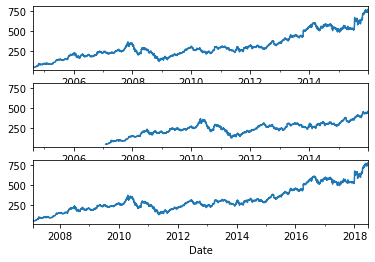

In [ ]:
fig, ax = plt.subplots(3, sharey=True)

goog_close = goog_close.asfreq('D', method='pad')

goog_close.plot(ax=ax[0])
goog_close.shift(900).plot(ax=ax[1])  # shift the data
goog_close.tshift(900).plot(ax=ax[2])  # simply shift the index

Example
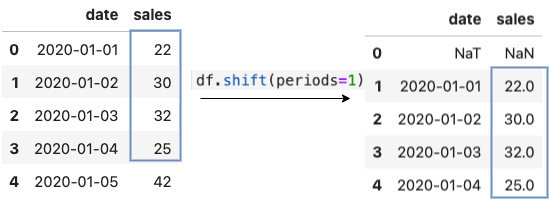

/tmp/ipykernel_16666/2184123071.py:5: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog_close.tshift(-365) / goog_close)


'\nThis helps us to see the overall trend in Google stock: \nthus far, the most profitable times to invest in Google \nhave been (unsurprisingly, in retrospect) shortly after its IPO, and \nin the middle of the 2009 recession.\n'

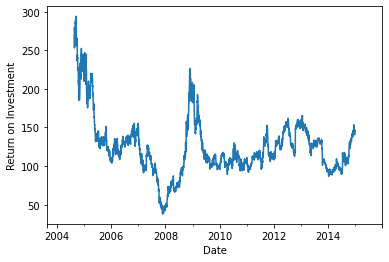

In [ ]:
# why shift?
# A common context for this type of shift is in computing differences 
# over time. For example, we use shifted values to compute the one-year 
# return on investment for Google stock over the course of the dataset:
ROI = 100 * (goog_close.tshift(-365) / goog_close)
ROI.plot()
plt.ylabel('Return on Investment')

'''
This helps us to see the overall trend in Google stock: 
thus far, the most profitable times to invest in Google 
have been (unsurprisingly, in retrospect) shortly after its IPO, and 
in the middle of the 2009 recession.
'''

Example
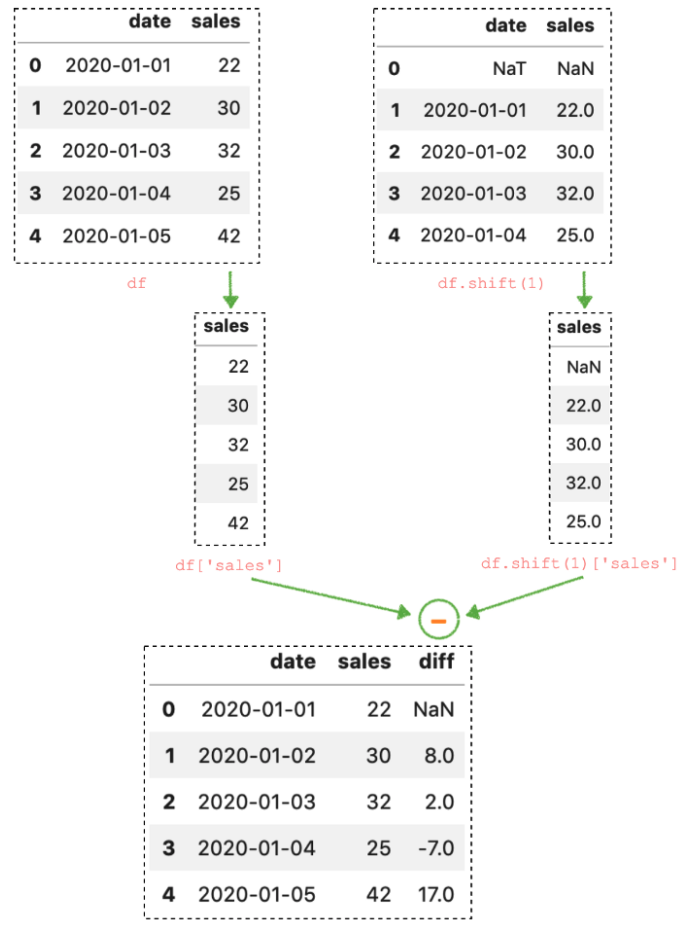

In [ ]:
## Rolling window
rolling = goog_close.rolling(365, center = True)
rolling

Rolling [window=365,center=True,axis=0,method=single]

<AxesSubplot:xlabel='Date'>

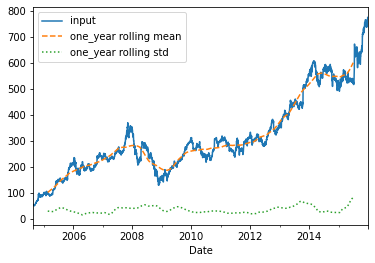

In [ ]:
data = pd.DataFrame({'input': goog_close,
                   'one_year rolling mean': rolling.mean(),
                   'one_year rolling std': rolling.std()})

data.plot(style=['-', '--', ':'])

Example of rolling sum
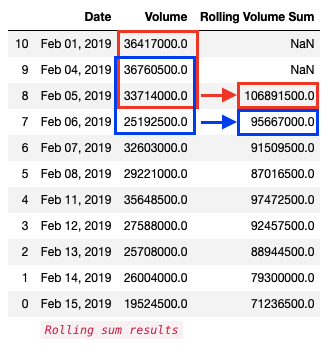

## <span style="color:blue"> \\\ Quiz Time - Time Series //</span> 

## Bicycle Counts

In [ ]:
import pandas as pd
# Example: Visualizing Seattle Bicycle Counts
data = pd.read_csv('data/FremontBridge.csv')

In [ ]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date',
                  parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-03-31 23:00:00,6.0,10.0
2019-03-31 22:00:00,7.0,14.0
2019-03-31 21:00:00,18.0,15.0
2019-03-31 20:00:00,26.0,31.0
2019-03-31 19:00:00,30.0,58.0


In [ ]:
data.columns = ['West', 'East']  #rename
data.head()

,West,East
Date,,
2019-03-31 23:00:00,6.0,10.0
2019-03-31 22:00:00,7.0,14.0
2019-03-31 21:00:00,18.0,15.0
2019-03-31 20:00:00,26.0,31.0
2019-03-31 19:00:00,30.0,58.0


In [ ]:
# check any missing values
data.isna().sum()

# fillna with 0
data.fillna(0, inplace=True)

# feature engineering
data['Total'] = data['East'] + data['West']

In [ ]:
data.head()

,West,East,Total
Date,,,
2019-03-31 23:00:00,6.0,10.0,16.0
2019-03-31 22:00:00,7.0,14.0,21.0
2019-03-31 21:00:00,18.0,15.0,33.0
2019-03-31 20:00:00,26.0,31.0,57.0
2019-03-31 19:00:00,30.0,58.0,88.0


Text(0, 0.5, 'Weekly bicycle count')

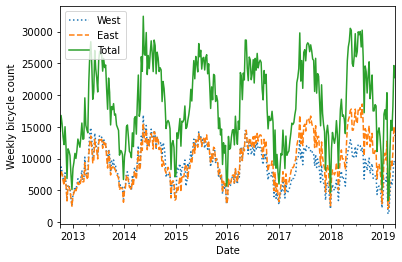

In [ ]:
# let do some plot, checking on weekly trend

import matplotlib.pyplot as plt
import numpy as np

weekly = data.resample('W').agg('sum')  #can also do .sum()
weekly.plot(style=[":", "--", '-'])
plt.ylabel('Weekly bicycle count')

# seems like people bicycle in summer more than winter

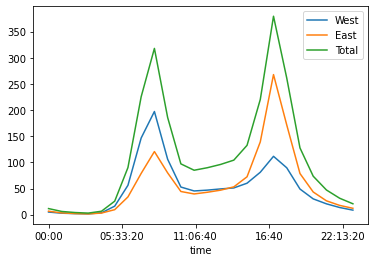

In [ ]:
# let's look at what time people usually bicycle
by_time = data.groupby(data.index.time).mean()
by_time.plot()
# hourly_ticks = 4 * 60 * 60 * np.arange(6)   #every four hours
# by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

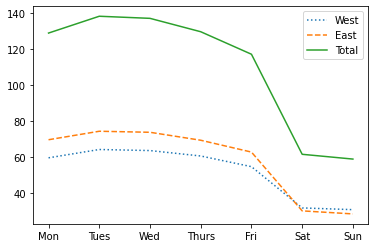

In [ ]:
# how about days?
by_day = data.groupby(data.index.dayofweek).mean()
by_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_day.plot(style=[':', '--', '-'])

### === Task 3 ===

1. Load "data/appl_1980_2014.csv" into df

2. Transform Date column to datetime type

3. Then filter only with year not less than 1987

4. Sort the index in an ascending order (oldest date first) - use sort_index

5. We want to know how apple does on end of every month, thus get the mean value for each columns, resample at last buiness day of each month (i.e., BM)

6. BTW, how many months do we have in our data?

7. Compare the differences between this year and last year High column, using shift(), where the differences is simply this_year - last_year.  Plot this graph, where x-axis is date, and y-axis is the gain/loss

8. Perform a rolling mean (moving average) of Close with window size of 100 days

9. Load microsoft data using this code <code>microsoft = data.DataReader('MSFT', start='1987', end='2014', data_source='yahoo')</code>.  Compare Apple and Microsoft of their return rate of "close" price based on year 2000 onward, where the formula is simply <code>close price / close price [0]</code> where close price [0] is simply the first close price of year 2000.